## Aluno: Fernando Gomes Papi

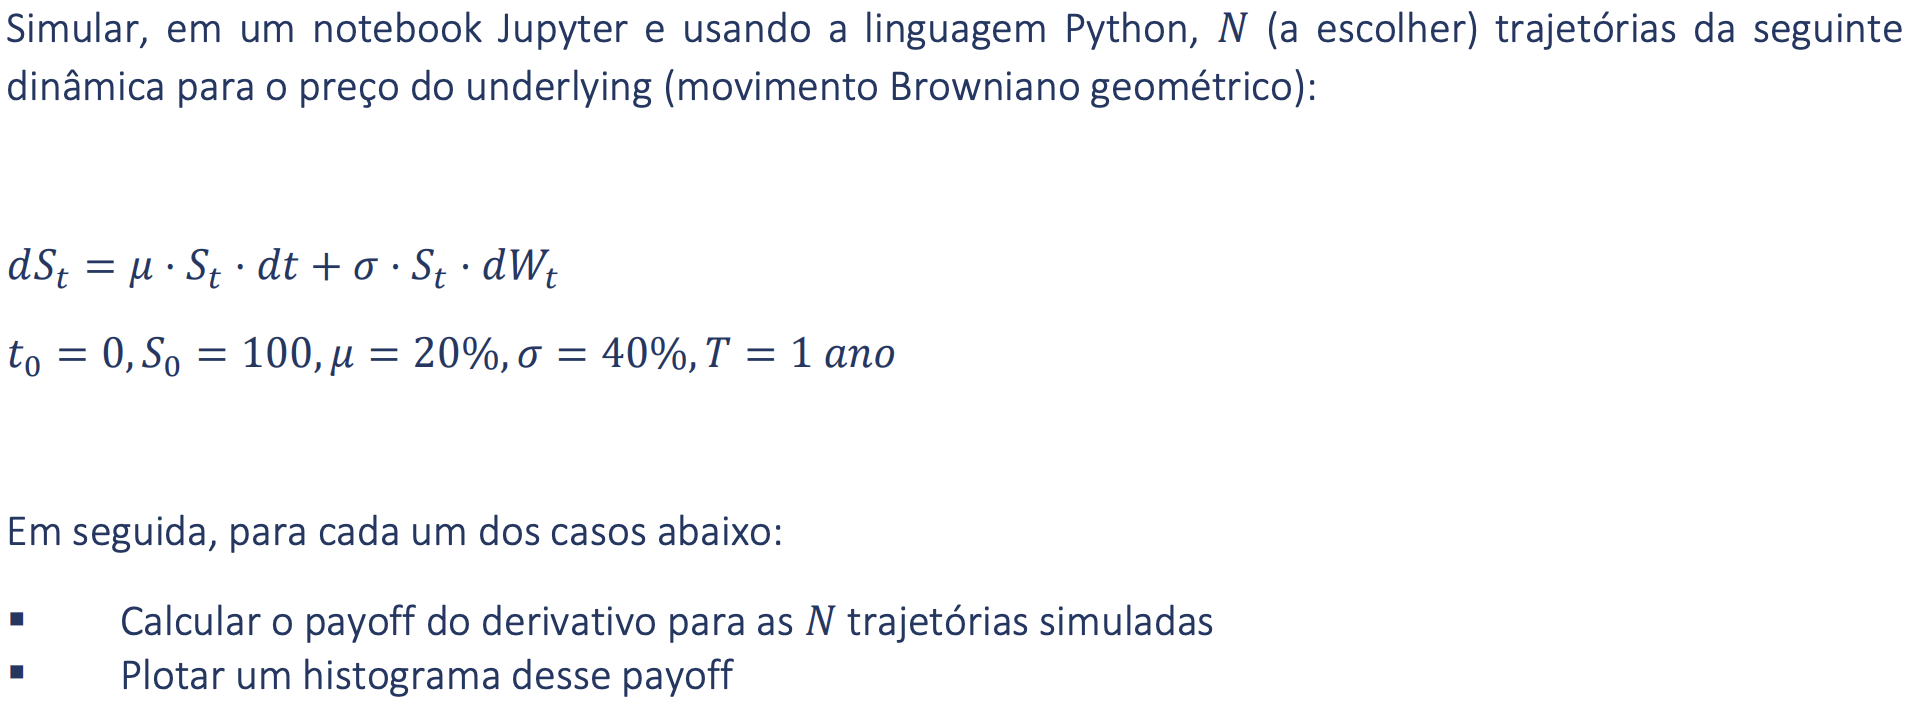

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [12]:
def plot_histogram(payoffs, title):
    # Set the style for the plot (optional)
    plt.figure(figsize=(8,8))
    sns.set(style="whitegrid")
    
    # Create a beautiful histogram
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    
    # Add labels and a title (customize as needed)
    plt.xlabel("Payoff")
    plt.ylabel("Payoff Count")
    plt.title(title)
    
    # Show the plot
    plt.show()

In [13]:
from aleatory.processes import GBM

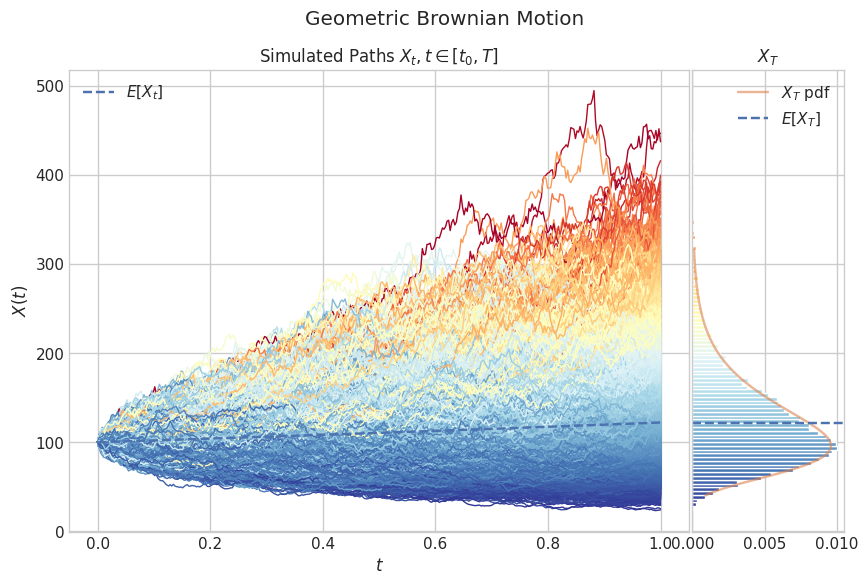

In [20]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)
fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=10000 ,**fig_kw)

In [24]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.957287,94.635421,100.050634,98.135115,93.570818,97.162642,100.873833,100.627167,103.497588,97.490351,...,101.287565,96.861537,101.332630,100.597875,99.805452,101.426338,100.946414,101.619622,99.887284,99.546887
2,99.007455,94.507850,100.106115,96.761092,100.851336,96.735648,98.208800,101.701986,102.651925,98.958439,...,98.825624,93.687880,100.800120,100.059433,100.101988,104.108944,103.305020,100.951318,101.028765,101.441302
3,100.690781,97.960250,100.266894,97.597281,99.602152,99.805249,98.783550,104.278916,103.086523,101.779615,...,100.269089,92.997426,101.953340,98.721664,100.156234,102.298316,103.660689,100.599657,97.975838,103.149210
4,97.427430,97.069859,99.065028,95.287612,98.772183,100.062894,99.234271,104.947682,101.936579,100.470070,...,98.074304,95.738452,101.477610,102.978557,102.319394,101.091129,105.118844,102.155860,95.537127,99.569868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,83.523675,163.102475,74.920965,159.018792,91.311315,182.212787,96.790820,127.214208,172.151122,92.675016,...,70.010361,55.922285,110.351368,81.663469,75.596656,92.985570,87.251218,181.695649,134.597478,66.164273
361,81.572431,168.195221,78.549666,163.343445,91.247721,177.519092,96.336067,129.850119,176.151735,91.899311,...,70.914686,55.953018,110.553528,83.052684,73.506511,92.077493,89.888867,177.437902,137.392527,66.472180
362,82.310609,169.708110,78.800876,160.893196,88.470989,177.869315,95.140177,128.204175,178.952210,93.945305,...,70.212499,55.728445,112.884751,83.889473,72.075069,91.340681,90.723781,175.789867,140.096325,67.771836
363,82.816288,169.007381,78.483862,159.074903,88.209669,176.830036,95.211776,128.163125,179.598965,96.619689,...,72.728991,54.878200,114.518478,80.856226,69.703281,89.382612,93.101078,173.512296,140.909347,66.558849


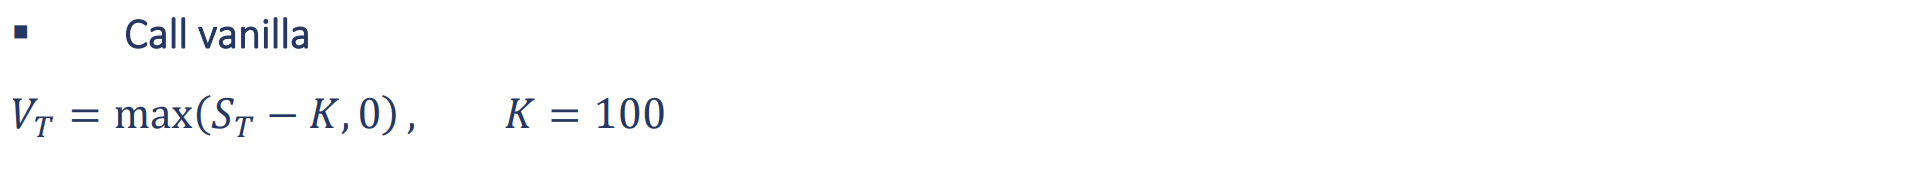

In [25]:
K = 100 # strike price

def payoff_call_vanilla(final_price, strike):
    return max(final_price - strike, 0)

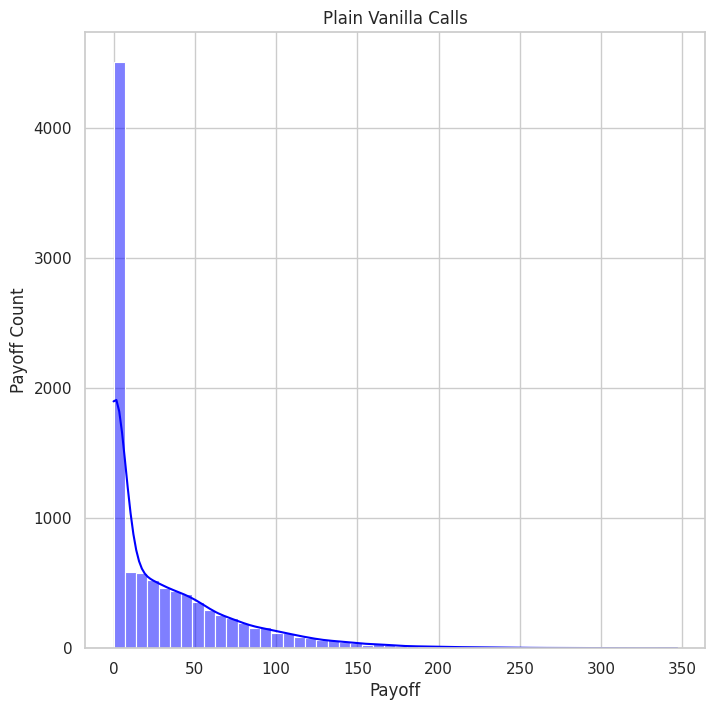

In [26]:
# final value of each price path
final_values = gbm_paths_df.iloc[-1]

# calculate all payoffs for vanilla call options
payoffs_vanilla = final_values.apply(lambda x: payoff_call_vanilla(x, K))
# plot histogram
plot_histogram(payoffs_vanilla, 'Plain Vanilla Calls')

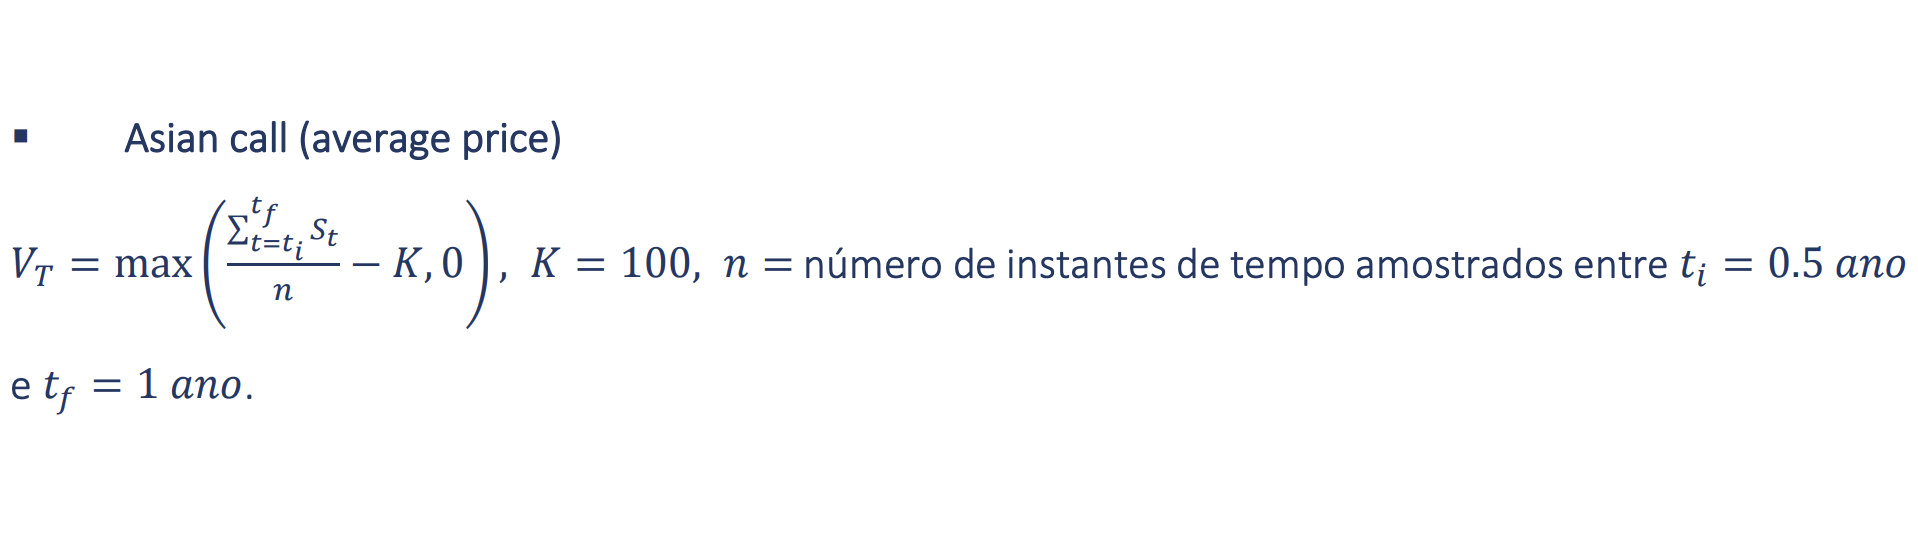

In [51]:
# strike price
K = 100

def payoff_asian_call(prices, strike_price):
    # average of the price path
    avg_price = np.mean(prices)
    # # calculate payoff
    payoff = max(avg_price - strike_price, 0)
    return payoff

In [52]:
# get n points of the price path, where n = 0.5*T
n = int(0.5 * len(gbm_paths_df)) # 364/2 points

# slice to get last n values
price_values = gbm_paths_df.iloc[-n:]

price_values.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
360,83.523675,163.102475,74.920965,159.018792,91.311315,182.212787,96.790820,127.214208,172.151122,92.675016,...,70.010361,55.922285,110.351368,81.663469,75.596656,92.985570,87.251218,181.695649,134.597478,66.164273
361,81.572431,168.195221,78.549666,163.343445,91.247721,177.519092,96.336067,129.850119,176.151735,91.899311,...,70.914686,55.953018,110.553528,83.052684,73.506511,92.077493,89.888867,177.437902,137.392527,66.472180
362,82.310609,169.708110,78.800876,160.893196,88.470989,177.869315,95.140177,128.204175,178.952210,93.945305,...,70.212499,55.728445,112.884751,83.889473,72.075069,91.340681,90.723781,175.789867,140.096325,67.771836
363,82.816288,169.007381,78.483862,159.074903,88.209669,176.830036,95.211776,128.163125,179.598965,96.619689,...,72.728991,54.878200,114.518478,80.856226,69.703281,89.382612,93.101078,173.512296,140.909347,66.558849
364,81.737696,170.850595,81.032462,160.945627,89.107260,177.045340,96.130255,126.139280,182.860188,93.931522,...,72.977720,55.088357,112.984994,80.346387,69.946339,90.187379,91.301825,174.267176,139.503119,67.523104


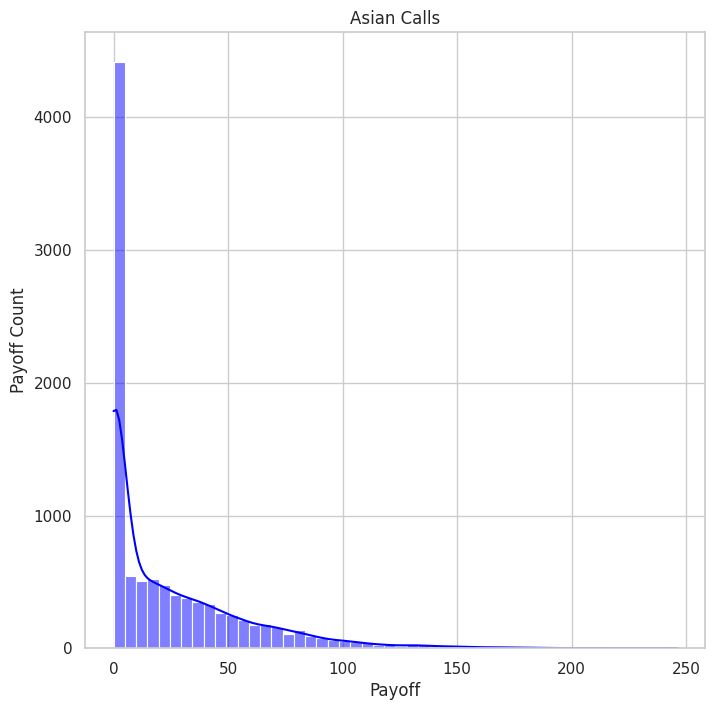

In [53]:
# calculate the payoff of asian call options
asian_payoffs = price_values.apply(lambda x: payoff_asian_call(x, K))

plot_histogram(asian_payoffs, 'Asian Calls')

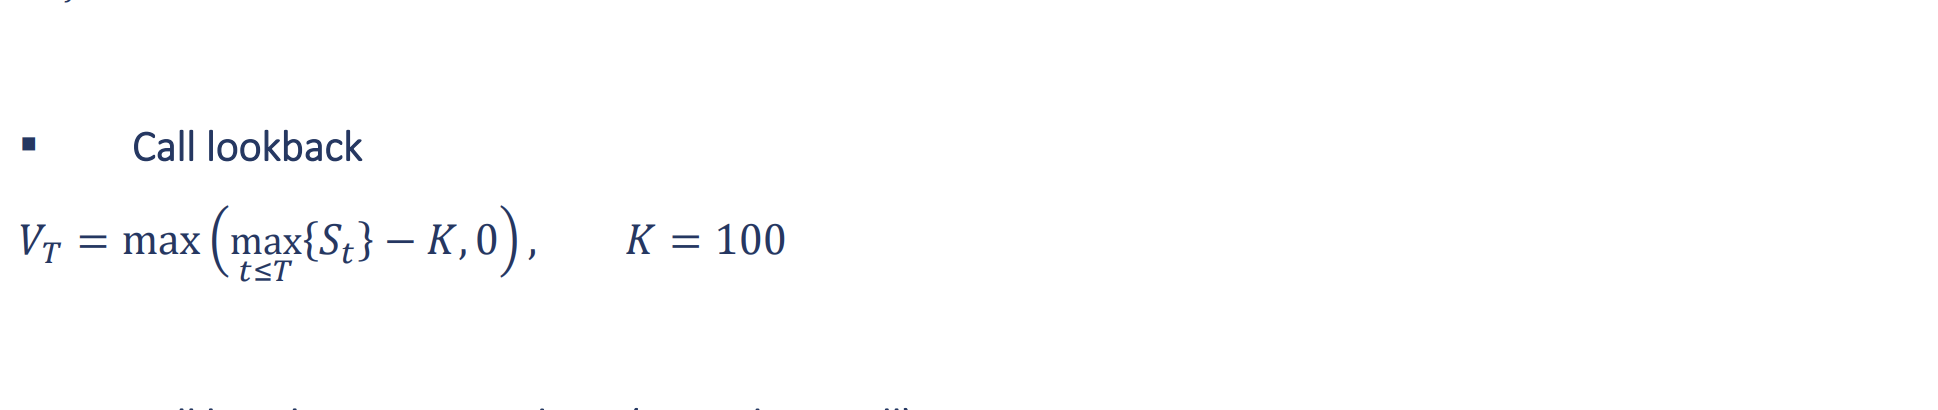

In [56]:
#strike price
K = 100

def payoff_lookback_call(prices, strike_price):
    # get the max of the price path
    max_price = max(prices)
    # calculate payoff between the max of the path and strike
    payoff = max(max_price - strike_price, 0)
    return payoff

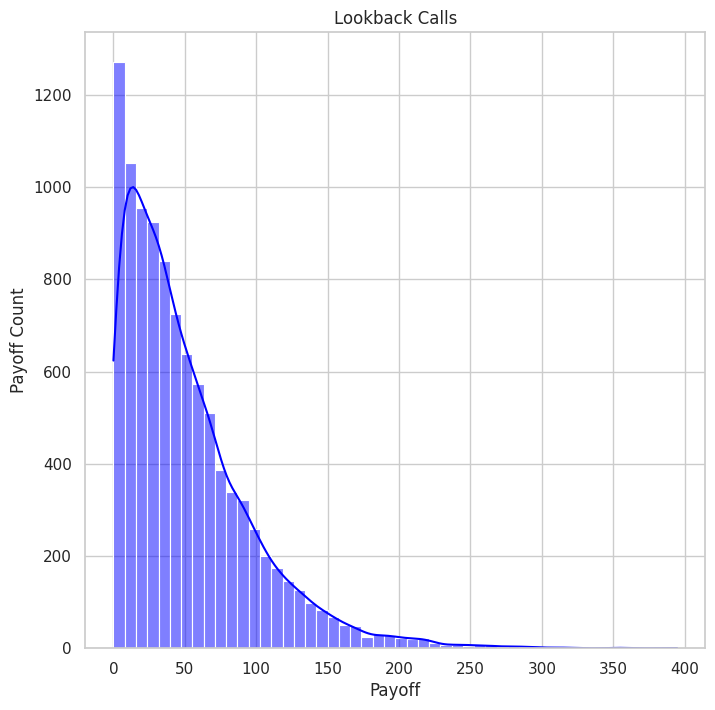

'Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'

In [60]:
# consider the whole price path
price_values = gbm_paths_df[1:]

# calculate payoffs
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_call(x, K))

plot_histogram(payoffs_lookback, 'Lookback Calls')

'''Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'''


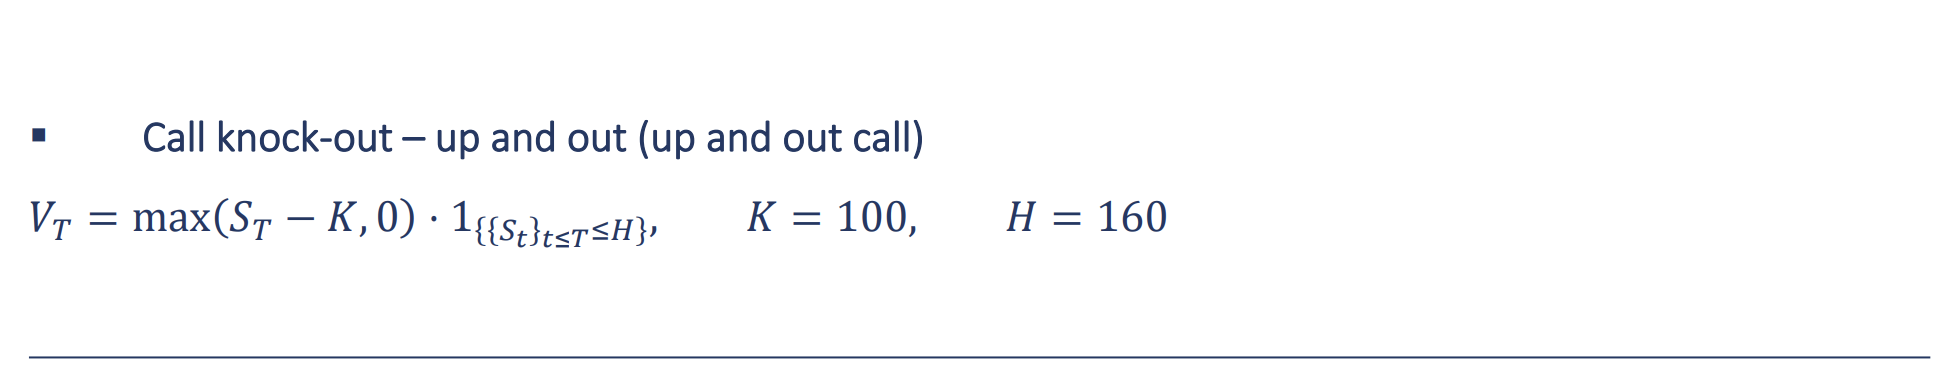

In [61]:
K = 100
barrier = 160

def payoff_call_up_and_out(prices, strike_price, barrier):
    # if at any point in the path we hit the upper barrier, 
    # the option payoff is 0
    if any(prices > barrier):
        return 0

    # otherwise the payoff is like a vanilla call option
    # get last price of path
    final_value = prices.iloc[-1]
    return max(final_value - strike_price, 0)

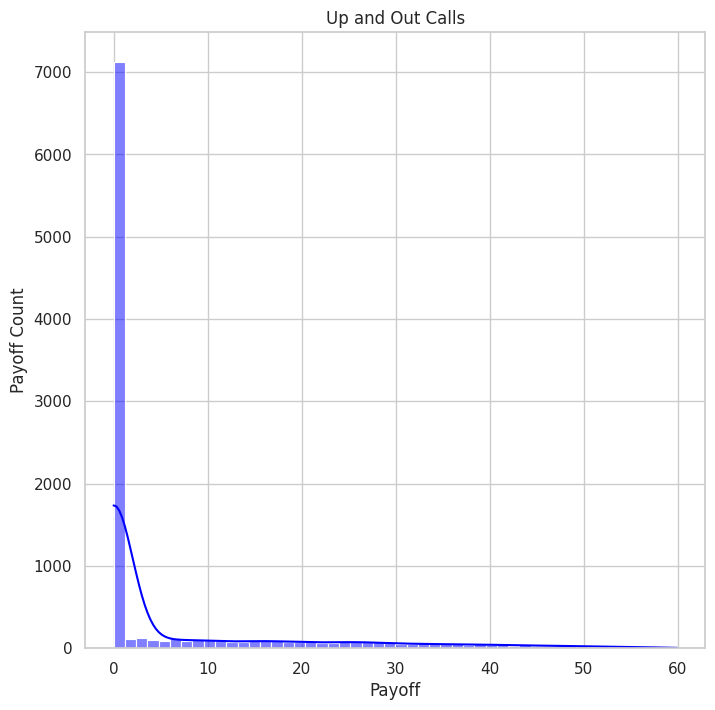

In [62]:
price_values = gbm_paths_df
payoffs_up_and_out = price_values.apply(lambda x: payoff_call_up_and_out(x, K, barrier))

plot_histogram(payoffs_up_and_out, 'Up and Out Calls')